# **📌 Day 7: Handling Outliers – Treatment Methods in Machine Learning (Python)**

Outliers can distort statistical measures and negatively impact machine learning models. Once detected (Day 6), the next step is handling them effectively.

## **🔍 Why Handle Outliers?**

✅ Prevents misleading insights

✅ Enhances model stability

✅ Reduces the risk of overfitting

## **🛠️ Methods to Handle Outliers**

1️⃣ *Capping (Winsorization)*

Replaces extreme values with a specified percentile (e.g., 5th and 95th percentiles).
Useful when outliers carry some meaningful information.

2️⃣ *Transformation Techniques*

- Log Transformation: Reduces skewness and minimizes outlier impact.
- Box-Cox Transformation: Normalizes non-Gaussian distributed data.
- Power Transformations: Stabilizes variance.

3️⃣ *Removing Outliers*

- Based on statistical measures (e.g., IQR, Z-score).
- Ideal when outliers are due to data errors or extreme noise.

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import zscore

In [3]:
# Sample dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution
data = np.append(data, [120, 130, 140])  # Adding outliers

In [4]:
df = pd.DataFrame(data, columns=['Value'])

In [5]:
print(df)

          Value
0     54.967142
1     48.617357
2     56.476885
3     65.230299
4     47.658466
..          ...
98    50.051135
99    47.654129
100  120.000000
101  130.000000
102  140.000000

[103 rows x 1 columns]


## Boxplot before handling outliers

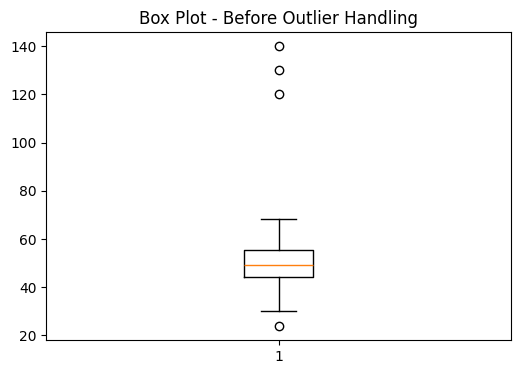

In [6]:
# Boxplot before handling outliers

plt.figure(figsize=(6, 4))
plt.boxplot(df['Value'])
plt.title("Box Plot - Before Outlier Handling")
plt.show()

## 🛠️ **Method 1: Capping (Winsorization)**

In [ ]:
lower_limit , upper_limit = np.percentile(df['Value'], [5,95])

df['Capped'] = np.where( df['Value'] > upper_limit, upper_limit , np.where(df['Value'] < lower_limit, lower_limit , df['Value']) )

In [8]:
df

,Value,Capped
0,54.967142,54.967142
1,48.617357,48.617357
2,56.476885,56.476885
3,65.230299,65.230299
4,47.658466,47.658466
...,...,...
98,50.051135,50.051135
99,47.654129,47.654129
100,120.000000,65.619829
101,130.000000,65.619829


## 🛠️ **Method 2: Log Transformation**

In [9]:
df['Log_Transformed'] = np.log(df['Value'] + 1)  # Adding 1 to avoid log(0)

In [10]:
df

,Value,Capped,Log_Transformed
0,54.967142,54.967142,4.024765
1,48.617357,48.617357,3.904341
2,56.476885,56.476885,4.051383
3,65.230299,65.230299,4.193138
4,47.658466,47.658466,3.884826
...,...,...,...
98,50.051135,50.051135,3.932828
99,47.654129,47.654129,3.884737
100,120.000000,65.619829,4.795791
101,130.000000,65.619829,4.875197


## 🛠️ **Method 3: Removing Outliers using Z-score**

In [11]:
df['Z_Score'] = zscore(df['Value'])
df_cleaned = df[(df['Z_Score'].abs() < 3)]  # Keeping only values within 3 standard deviations

In [12]:
df

,Value,Capped,Log_Transformed,Z_Score
0,54.967142,54.967142,4.024765,0.223119
1,48.617357,48.617357,3.904341,-0.165538
2,56.476885,56.476885,4.051383,0.315527
3,65.230299,65.230299,4.193138,0.851304
4,47.658466,47.658466,3.884826,-0.224229
...,...,...,...,...
98,50.051135,50.051135,3.932828,-0.077779
99,47.654129,47.654129,3.884737,-0.224495
100,120.000000,65.619829,4.795791,4.203638
101,130.000000,65.619829,4.875197,4.815716


## Boxplot after handling outliers

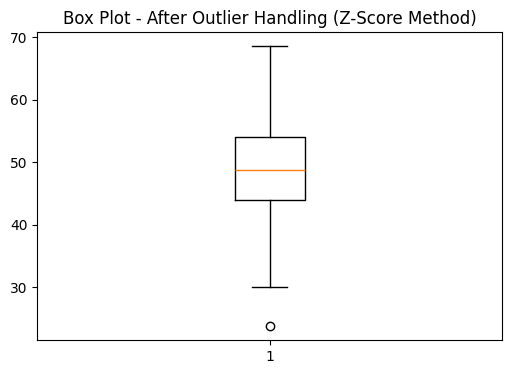

In [13]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_cleaned['Value'])
plt.title("Box Plot - After Outlier Handling (Z-Score Method)")
plt.show()

## Display results

In [14]:
# Display results
print("Before Handling Outliers:\n", df.describe())
print("\nAfter Removing Outliers (Z-Score Method):\n", df_cleaned.describe())

Before Handling Outliers:
             Value      Capped  Log_Transformed       Z_Score
count  103.000000  103.000000       103.000000  1.030000e+02
mean    51.321878   49.588123         3.922166 -5.346317e-16
std     16.417675    8.953544         0.252448  1.004890e+00
min     23.802549   32.997218         3.210946 -1.684398e+00
25%     44.185369   44.185369         3.810764 -4.368102e-01
50%     49.279899   49.279899         3.917605 -1.249851e-01
75%     55.279137   55.279137         4.030321  2.422152e-01
max    140.000000   65.619829         4.948760  5.427794e+00

After Removing Outliers (Z-Score Method):
             Value      Capped  Log_Transformed     Z_Score
count  100.000000  100.000000       100.000000  100.000000
mean    48.961535   49.107172         3.893634   -0.144471
std      9.081684    8.635578         0.193158    0.555870
min     23.802549   32.997218         3.210946   -1.684398
25%     43.990943   43.990943         3.806461   -0.448711
50%     48.730437   48.730